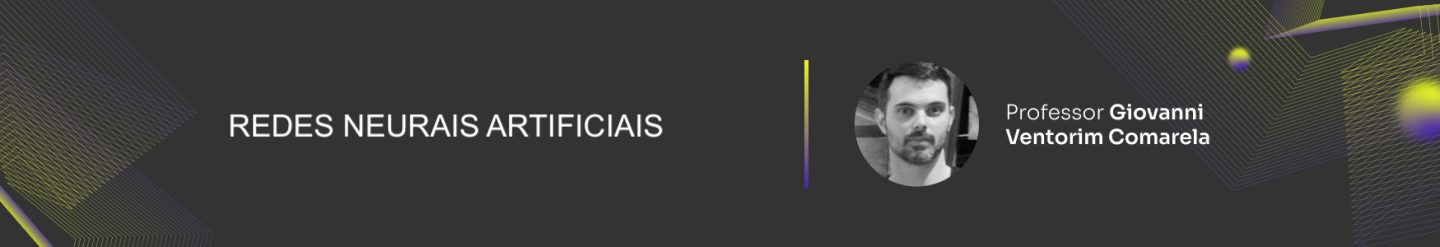

# MLP - Treinamento - Desafios

O poder para detecção de padrões e a flexibilidade  das MLPs vêm com um custo. Dado um conjunto de treinamento, para se obter um bom modelo de classificação/regressão, o usuário tem que fazer uma série de escolhas tanto para o **modelo** quanto para o **algoritmo de treinamento**.

Boas escolhas podem levar a bons modelos. Escolhas ruins podem ter resultados catastróficos.

Neste contexto, entre os principais desafios para o treinamento de uma MLP, podemos mencionar:

1. Mínimos locais, i.e., convergência do SGD para um modelo não ótimo;
2. Eficiência no treinamento, i.e., alto tempo de treinamento;
3. *Underfitting*, i.e., um modelo muito simples para padrões complexos;
4. *Overfitting*, i.e., um modelo especializado nos dados de treinamento e incapaz de generalizar para dados novos.

Na aula de hoje, veremos exemplos relacionados aos Desafios (3) e (4). Na próxima aula, veremos conceitos e técnicas relacionadas a todos esses desafios.


## *Underfitting*

Para exemplificar *underfitting* em redes neurais, vamos utilizar o conjunto de dados de Reconhecimento de Dígitos, o qual já foi utilizado em aulas passadas e também na disciplina de Classificação de Dados.

Para relembrar, cada linha do conjunto de dados representa uma imagem. Cada coluna, representa a intensidade (em escala de cinza) de um dado píxel da imagem.

In [ ]:
from sklearn.datasets import load_digits

# carregando o conjunto de dados
X, y = load_digits(return_X_y = True, as_frame = True)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


Como de costume, vamos começar com boas práticas de pré-processamento:
 - divisão do conjunto de dados em porções para treinamento e teste; e

 -padronização por reescala.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# ajustando o scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Agora, vamos utilizar a biblioteca `Keras` para a obtenção do modelo.

In [ ]:
from tensorflow import keras

Primeiro, por ser um problema de classificação com dez classes, é necessário codificar os rótulos utilizando *one-hot encoding*.

In [ ]:
encoder = keras.layers.CategoryEncoding(num_tokens = 10, output_mode="one_hot")
y_train_encoded = encoder(y_train)
y_train_encoded

<tf.Tensor: shape=(1257, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

Para exemplificar *underfitting*, vamos escolher um modelo de MLP bem simples. Há apenas uma camada oculta e apenas duas unidades nessa camada.

In [ ]:
# definição do modelo
model = keras.Sequential([
    keras.layers.Input((64,)),                              # camada de entrada
    keras.layers.Dense(units = 2, activation = "relu",),    # camada oculta
    keras.layers.Dense(units = 10, activation = "softmax")] # camada de saída
)

O próximo passo é o treinamento. Nesse momento, há parâmetros sendo utilizados que ainda não foram definidos. Todos eles serão estudados em aulas futuras.

In [ ]:
model.compile(loss = "categorical_crossentropy")
model.fit(X_train, y_train_encoded, epochs = 200, verbose = 0); # treinamento

Após o treinamento, a rede pode ser utilizada. No código abaixo, utilizamos o modelo treinado no conjunto de teste.

Lembre que a saída do modelo não são as classes preditas dos elementos do conjunto de teste, mas sim, as saídas da função *softmax*, referente à última camada da MLP. Ou seja, o método `predict` da biblioteca `Keras` retorna $\phi(\mathbf{x})$.

Para converter as probabilidades acima em classes (i.e., rótulos), é necessário identificar qual a posição do vetor (referente ao dígito equivalente) tem maior chance de ocorrência. Isso é feito no código abaixo com a função `argmax` da biblioteca `numpy`.

In [ ]:
import numpy as np
phi = model.predict(X_test, verbose = 0)
y_pred = np.argmax(phi, axis = 1)
y_pred

array([0, 3, 9, 0, 6, 6, 6, 8, 3, 3, 6, 7, 1, 6, 9, 0, 7, 2, 4, 1, 3, 2,
       9, 9, 5, 0, 6, 6, 1, 0, 1, 1, 5, 5, 1, 6, 3, 6, 6, 0, 6, 1, 9, 1,
       7, 8, 1, 6, 1, 3, 1, 9, 8, 6, 2, 7, 1, 7, 7, 6, 4, 3, 3, 2, 2, 0,
       3, 2, 1, 2, 1, 7, 4, 0, 1, 7, 0, 4, 2, 3, 0, 2, 9, 3, 5, 9, 4, 2,
       1, 9, 1, 3, 4, 6, 3, 7, 0, 0, 3, 8, 3, 9, 1, 2, 7, 0, 9, 6, 7, 6,
       5, 3, 3, 8, 7, 3, 2, 7, 9, 4, 5, 6, 1, 1, 7, 9, 2, 0, 5, 7, 6, 6,
       6, 5, 4, 1, 0, 0, 2, 9, 1, 7, 0, 6, 6, 3, 4, 3, 1, 6, 5, 9, 7, 1,
       0, 0, 2, 8, 4, 4, 2, 5, 6, 2, 4, 3, 3, 5, 0, 2, 3, 6, 7, 2, 7, 9,
       8, 2, 3, 3, 8, 0, 9, 7, 1, 1, 3, 2, 7, 8, 4, 0, 2, 6, 5, 4, 4, 4,
       0, 8, 3, 9, 0, 3, 7, 6, 3, 0, 2, 1, 1, 4, 3, 0, 2, 9, 3, 6, 6, 9,
       6, 2, 0, 7, 9, 1, 2, 4, 5, 9, 7, 8, 8, 3, 0, 4, 7, 3, 2, 4, 4, 3,
       7, 1, 9, 1, 7, 0, 2, 3, 1, 2, 0, 1, 0, 2, 9, 2, 0, 2, 5, 1, 3, 0,
       9, 3, 5, 1, 8, 0, 2, 5, 1, 4, 9, 0, 7, 3, 2, 4, 6, 9, 7, 2, 7, 3,
       9, 9, 9, 6, 5, 9, 8, 3, 9, 6, 0, 0, 9, 9, 0,

Por fim, podemos apresentar as métricas de avaliação.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73        53
           1       0.47      0.47      0.47        60
           2       0.62      0.68      0.65        63
           3       0.50      0.78      0.61        54
           4       0.87      0.79      0.83        52
           5       0.29      0.15      0.19        48
           6       0.82      0.88      0.85        51
           7       0.88      0.94      0.91        48
           8       0.70      0.25      0.37        63
           9       0.56      0.69      0.62        48

    accuracy                           0.64       540
   macro avg       0.64      0.65      0.62       540
weighted avg       0.63      0.64      0.62       540



Dos resultados acima, pode-se perceber que o modelo treinado teve um desempenho muito ruim.

Em aulas passadas e na disciplina de Classificação de Dados, conseguimos resultados muito melhores que esses.

**Qual o motivo para esses resultados ruins?** Simples! A MLP escolhida é muito pequena e não tem expressividade para um conjunto de dados complexo como o utilizado. Esse é um exemplo clássico de *underfitting*.

## *Overfitting*

Uma tentativa natural de se evitar *underfitting* é simplesmente utilizar uma MLP grande, muito grande (em número de camadas e unidades nas camadas)!

Apesar de natural, uma abordagem como essa pode gerar dois problemas:
- Desperdício de recursos computacionais e/ou tempos de treinamento muito elevados;
- *overfitting*, ou seja, modelos incapazes de generalizar para dados não vistos durante o treinamento.

Na disciplina de classificação de dados, nós já estudamos o fenômeno de *overfitting* extensivamente.

Veremos agora, como ele pode se manifestar em Redes Neurais Artificiais.

### *Overfitting* em Classificação

Considere o conjunto de dados ilustrado na figura abaixo. Nesse conjunto de dados, há duas características e três classes.



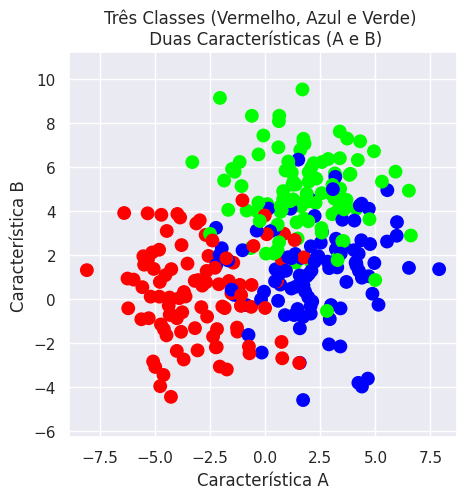

In [ ]:
#@title
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set()

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X, y = sk_data.make_blobs(n_samples=300,
                          centers=[[-3, 0],[2, 5], [2.5, 1.5]],
                          #centers=[[-2, 0],[1, 5], [2.5, 1.5]],
                          cluster_std = [2, 2, 2],
                          #cluster_std = [2, 2, 2],
                          n_features=2,
                          center_box=(-10.0, 10.0),random_state=0)
plt.figure(figsize = (5,5))
plt.axis('equal')
plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, s = 80);

plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title('Três Classes (Vermelho, Azul e Verde) \n Duas Características (A e B)');

Abaixo, o código para divisão dos dados em porções de treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                    random_state = 7)

Como há três classes e vamos utilizar a biblioteca `Keras`, é necessário codificar os rótulos utilizando *one-hot* encoding.

In [ ]:
encoder = keras.layers.CategoryEncoding(num_tokens = 3, output_mode="one_hot")
y_train_encoded = encoder(y_train)

Para a criação do modelo, vamos criar uma MLP com 2 camadas ocultas e com 100 unidades em cada camada. Para o problema em questão essa é uma MLP exagerada.

In [ ]:
# definição do modelo
model = keras.Sequential([
    keras.layers.Input((2,)),                                 # camada de entrada
    keras.layers.Dense(units = 100, activation = "relu",),    # camada oculta 1
    keras.layers.Dense(units = 100, activation = "relu",),    # camada oculta 2
    keras.layers.Dense(units = 3, activation = "softmax")]    # camada de saída
)

Fazendo o treinamento do modelo. Os parâmetros utilizados serão explicados na próxima aula. Por agora, não é necessário se preocupar com eles.

In [ ]:
model.compile(loss = "categorical_crossentropy")
model.fit(X_train, y_train_encoded,  epochs = 1000, verbose = 1, batch_size=32); # treinamento

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8780  
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6041 
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5477 
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5444 
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5145  
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4816 
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5079  
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5093 
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4593 
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4665 
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4489 
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4667 
Epoch 13/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4951 
Epoch 14/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4639 
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4789 
E

A seguir, é feita a predição dos rótulos. Para o exemplo, o modelo é aplicado tanto no conjunto de treinamento quanto no conjunto de teste.

In [ ]:
phi = model.predict(X_test)
phi_train = model.predict(X_train)
y_pred = np.argmax(phi, axis = 1)
y_train_pred = np.argmax(phi_train, axis = 1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Abaixo, as métricas de desempenho no modelo no conjunto nos conjuntos de treinamento e teste.

Pode-se perceber que o desempenho do modelo no conjunto de treinamento foi significativamente superior do que no conjunto de teste. Em outras palavras, o modelo não consegue generalizar e ter a mesma qualidade, que teve no conjunto de treinamento, no conjunto de teste.

Esse é resultado é evidência clara de *overfitting*.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.78      0.75      0.76        28
           2       0.71      0.73      0.72        30

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        68
           1       0.91      0.86      0.89        72
           2       0.82      0.91      0.86        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210



Para visualizar o fenômeno, a Figura abaixo apresenta as regiões de decisão do modelo sob os pontos do **conjunto de treinamento**.

Pode-se perceber que o modelo se especializou para o conjunto de treinamento, gerando regiões de decisão fragmentadas. Dessa forma, foi possível ter um classificador com bom desempenho nos dados de treinamento.

90000/90000 ━━━━━━━━━━━━━━━━━━━━ 124s 1ms/step


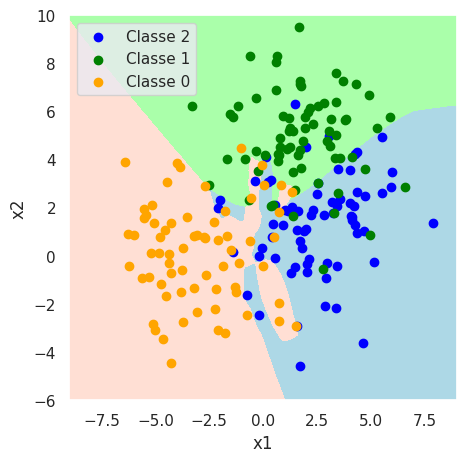

In [ ]:
#@title

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#ffdfd4', '#AAFFAA', '#ADD8E6'])

h = .01
x_min, x_max = -9, 9
y_min, y_max = -6, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, axs = plt.subplots(1, 1, figsize=(5, 5))


Z = np.array([np.argmax(b) for b in model.predict(np.column_stack((xx.ravel(), yy.ravel())))])


Z = Z.reshape(xx.shape)
axs.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')


df = pd.DataFrame(X_train, columns = ['x1', 'x2'])
df['Classe'] = y_train

#print(a)
axs.scatter(df[df['Classe'] == 2]['x1'], df[df['Classe'] == 2]['x2'], color = 'blue', label = 'Classe 2')
axs.scatter(df[df['Classe'] == 1]['x1'], df[df['Classe'] == 1]['x2'], color = 'green', label = 'Classe 1')
axs.scatter(df[df['Classe'] == 0]['x1'], df[df['Classe'] == 0]['x2'], color = 'orange', label = 'Classe 0')

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim((-9, 9))
plt.ylim((-6, 10))
plt.legend(loc = 'best');

Já a Figura abaixo apresentas as mesmas regiões de decisão (i.e., mesmo modelo), mas sob os pontos do **conjunto de teste**.

Claramente, as regiões de decisão, fragmentadas e especializadas para o conjunto de treinamento, não conseguem se adequar tão bem a dados não vistos previamente.

Novamente, essa é uma evidência clássica de *overfitting*.

90000/90000 ━━━━━━━━━━━━━━━━━━━━ 143s 2ms/step


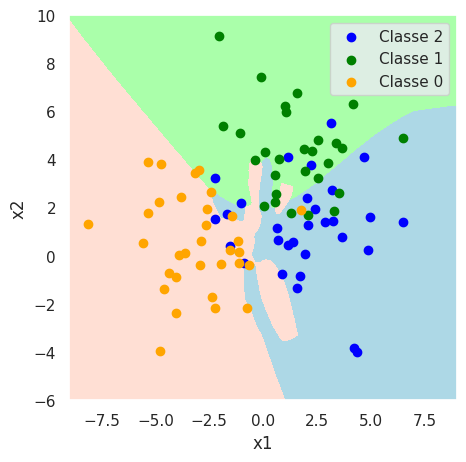

In [ ]:
#@title

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#ffdfd4', '#AAFFAA', '#ADD8E6'])

h = .01
x_min, x_max = -9, 9
y_min, y_max = -6, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, axs = plt.subplots(1, 1, figsize=(5, 5))


Z = np.array([np.argmax(b) for b in model.predict(np.column_stack((xx.ravel(), yy.ravel())))])


Z = Z.reshape(xx.shape)
axs.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')


df = pd.DataFrame(X_test, columns = ['x1', 'x2'])
df['Classe'] = y_test

#print(a)
axs.scatter(df[df['Classe'] == 2]['x1'], df[df['Classe'] == 2]['x2'], color = 'blue', label = 'Classe 2')
axs.scatter(df[df['Classe'] == 1]['x1'], df[df['Classe'] == 1]['x2'], color = 'green', label = 'Classe 1')
axs.scatter(df[df['Classe'] == 0]['x1'], df[df['Classe'] == 0]['x2'], color = 'orange', label = 'Classe 0')

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim((-9, 9))
plt.ylim((-6, 10))
plt.legend(loc = 'best');

### *Overfitting* em Regressão


Para dar uma outra perspectiva sobre o fenômeno de *overfitting*, vamos também analisar um exemplo relacionado à tarefa de **regressão**.

O exemplo a seguir é baseado no exemplo clássico de *overfitting* da biblioteca `scikit-learn`, disponível [aqui](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

O Conjunto de dados abaixo, apresenta um fenômeno potencialmente desconhecido (linha laranja) e medições que foram feitas sobre tal fenômeno.

Uma pergunta interessante aqui é: como podemos identificar o fenômeno real a partir das medições realizadas?

Essa é uma tarefa clássica de regressão!

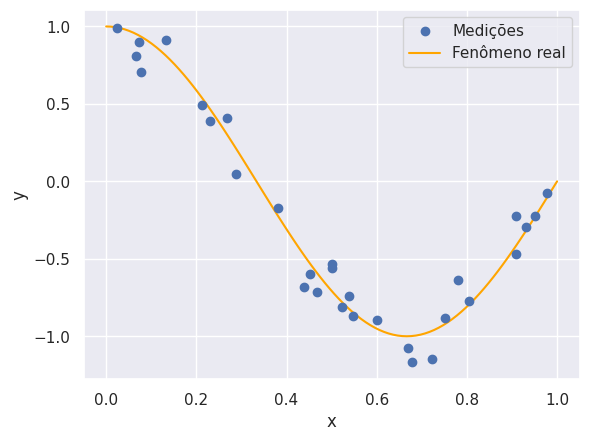

In [ ]:
#@title

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

from tensorflow import keras
sns.set()

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(7)

n_samples = 30
degrees = [1, 4, 15]



X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

np.random.seed()

X = X.reshape((-1, 1))
X_test = np.linspace(0, 1, 100).reshape((-1, 1))

plt.scatter(X, y, label = 'Medições', zorder = 2)
plt.plot(X_test, true_fun(X_test), color = 'orange', label="Fenômeno real", zorder = 1)
plt.legend(loc = 'best')
plt.xlabel('x');
plt.ylabel('y');

Como primeira tentativa, vamos usar a biblioteca `scikit-learn` para criar um MLP bem simples para os dados. No caso, apenas uma camada oculta com duas unidades.

In [ ]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(random_state = 7, max_iter=3000, hidden_layer_sizes=(2,)).fit(X, y)

Abaixo, podemos ver o que o modelo aprendeu sobre o fenômeno a partir dos dados.
Como é um modelo muito simples, podemos ver que a representatividade não é boa.

Esse é um cenário de *underfitting*.

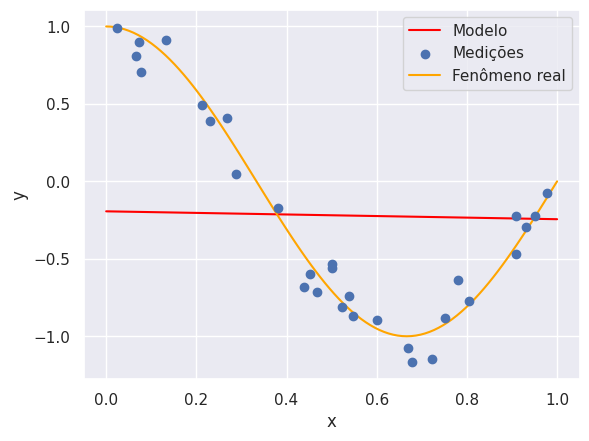

In [ ]:
#@title
y_pred = clf.predict(X_test)
plt.plot(X_test, y_pred, color = 'red', label = 'Modelo', zorder = 1)
plt.scatter(X, y, label = 'Medições', zorder = 2)
plt.plot(X_test, true_fun(X_test), color = 'orange', label="Fenômeno real", zorder = 1)
plt.legend(loc = 'best')
plt.xlabel('x');
plt.ylabel('y');

Em contrapartida ao exemplo acima, vamos agora usar a biblioteca `Keras` para fazer um modelo completamente exagerado.

São cinco camadas ocultas, cada uma com 1000 unidades.

**Observação:** o código abaixo demora muito para executar.

In [ ]:
model = keras.Sequential([
    keras.layers.Input((1,)),                                # camada de entrada
    keras.layers.Dense(units = 1000, activation = "relu",),  # camada oculta 1
    keras.layers.Dense(units = 1000, activation = "relu",),  # camada oculta 2
    keras.layers.Dense(units = 1000, activation = "relu",),  # camada oculta 3
    keras.layers.Dense(units = 1000, activation = "relu",),  # camada oculta 4
    keras.layers.Dense(units = 1000, activation = "relu",),  # camada oculta 5
    keras.layers.Dense(units = 1, activation = "linear")]    # camada de saída
)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = "mean_squared_error", optimizer = opt)
model.fit(X, y,  epochs = 2000, verbose = 2); # treinamento

Epoch 1/2000
1/1 - 4s - 4s/step - loss: 0.0013
Epoch 2/2000
1/1 - 0s - 264ms/step - loss: 0.0014
Epoch 3/2000
1/1 - 0s - 170ms/step - loss: 0.0013
Epoch 4/2000
1/1 - 0s - 295ms/step - loss: 0.0014
Epoch 5/2000
1/1 - 0s - 194ms/step - loss: 0.0014
Epoch 6/2000
1/1 - 0s - 275ms/step - loss: 0.0013
Epoch 7/2000
1/1 - 0s - 317ms/step - loss: 0.0013
Epoch 8/2000
1/1 - 0s - 293ms/step - loss: 0.0013
Epoch 9/2000
1/1 - 0s - 312ms/step - loss: 0.0013
Epoch 10/2000
1/1 - 0s - 145ms/step - loss: 0.0013
Epoch 11/2000
1/1 - 0s - 91ms/step - loss: 0.0013
Epoch 12/2000
1/1 - 0s - 93ms/step - loss: 0.0013
Epoch 13/2000
1/1 - 0s - 135ms/step - loss: 0.0013
Epoch 14/2000
1/1 - 0s - 144ms/step - loss: 0.0013
Epoch 15/2000
1/1 - 0s - 93ms/step - loss: 0.0013
Epoch 16/2000
1/1 - 0s - 154ms/step - loss: 0.0013
Epoch 17/2000
1/1 - 0s - 126ms/step - loss: 0.0013
Epoch 18/2000
1/1 - 0s - 142ms/step - loss: 0.0013
Epoch 19/2000
1/1 - 0s - 109ms/step - loss: 0.0013
Epoch 20/2000
1/1 - 0s - 149ms/step - loss: 0.

Observando a Figura abaixo, pode-se perceber que o modelo basicamente "decorou" os pontos do conjunto de treinamento. Com isso, o modelo perde capacidade de generalização para dados não vistos e faz predições não adequadas.

Esse é um caso clássico de *overfitting* em regressão.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


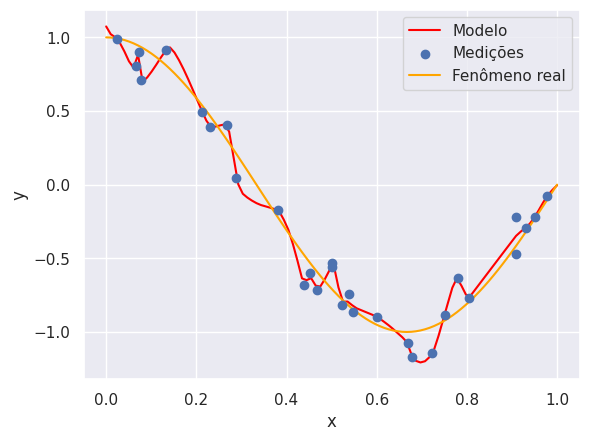

In [ ]:
#@title
y_pred = model.predict(X_test)
plt.plot(X_test, y_pred, color = 'red', label = 'Modelo', zorder = 1)
plt.scatter(X, y, label = 'Medições', zorder = 2)
plt.plot(X_test, true_fun(X_test), color = 'orange', label="Fenômeno real", zorder = 1)
plt.legend(loc = 'best')
plt.xlabel('x');
plt.ylabel('y');

Por fim, a título de comparação, abaixo é feito o treinamento de uma MLP de tamanho intermediário.

In [ ]:
model = keras.Sequential([
    keras.layers.Input((1,)),                                # camada de entrada
    keras.layers.Dense(units = 100, activation = "relu",),   # camada oculta 1
    keras.layers.Dense(units = 50, activation = "relu",),    # camada oculta 2
    keras.layers.Dense(units = 1, activation = "linear")]    # camada de saída
)
model.compile(loss = "mean_squared_error")
model.fit(X, y,  epochs = 400, verbose = 2); # treinamento

Epoch 1/400
1/1 - 1s - 1s/step - loss: 0.5022
Epoch 2/400
1/1 - 0s - 110ms/step - loss: 0.4392
Epoch 3/400
1/1 - 0s - 65ms/step - loss: 0.4104
Epoch 4/400
1/1 - 0s - 67ms/step - loss: 0.3937
Epoch 5/400
1/1 - 0s - 68ms/step - loss: 0.3806
Epoch 6/400
1/1 - 0s - 67ms/step - loss: 0.3710
Epoch 7/400
1/1 - 0s - 63ms/step - loss: 0.3630
Epoch 8/400
1/1 - 0s - 67ms/step - loss: 0.3565
Epoch 9/400
1/1 - 0s - 65ms/step - loss: 0.3513
Epoch 10/400
1/1 - 0s - 70ms/step - loss: 0.3467
Epoch 11/400
1/1 - 0s - 65ms/step - loss: 0.3426
Epoch 12/400
1/1 - 0s - 68ms/step - loss: 0.3387
Epoch 13/400
1/1 - 0s - 139ms/step - loss: 0.3350
Epoch 14/400
1/1 - 0s - 68ms/step - loss: 0.3315
Epoch 15/400
1/1 - 0s - 79ms/step - loss: 0.3285
Epoch 16/400
1/1 - 0s - 66ms/step - loss: 0.3256
Epoch 17/400
1/1 - 0s - 246ms/step - loss: 0.3228
Epoch 18/400
1/1 - 0s - 171ms/step - loss: 0.3200
Epoch 19/400
1/1 - 0s - 108ms/step - loss: 0.3174
Epoch 20/400
1/1 - 0s - 62ms/step - loss: 0.3147
Epoch 21/400
1/1 - 0s - 61

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


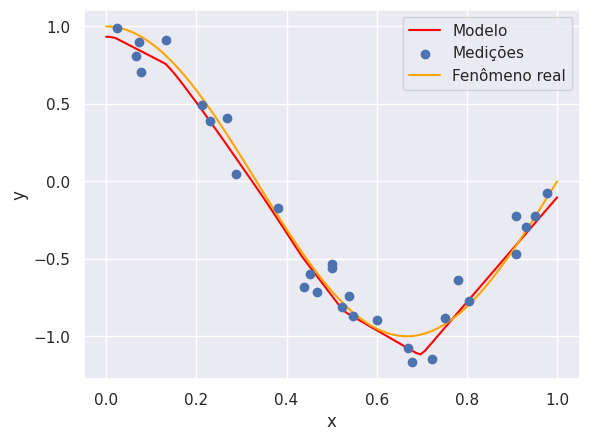

In [ ]:
#@title
y_pred = model.predict(X_test)
plt.plot(X_test, y_pred, color = 'red', label = 'Modelo', zorder = 1)
plt.scatter(X, y, label = 'Medições', zorder = 2)
plt.plot(X_test, true_fun(X_test), color = 'orange', label="Fenômeno real", zorder = 1)
plt.legend(loc = 'best')
plt.xlabel('x');
plt.ylabel('y');

Com os resultados apresentados, podemos ver que esse modelo se ajustou bem ao comportamento do fenômeno a partir dos dados.

No geral, queremos modelos com esse tipo de característica.